In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combine_df = pd.merge(clinical_trial, mouse_drug, on="Mouse ID")
combine_df['Tumor Volume (mm3)'] = combine_df['Tumor Volume (mm3)'].astype(float).map("{:,.1f}".format)

# Display the data table for preview
combine_df.groupby('Mouse ID', sort=False).first().reset_index().head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combine_df = pd.merge(clinical_trial, mouse_drug, on="Mouse ID")
tumor_group_df = combine_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']
mean_tumor_volume = tumor_group_df.mean()

# Convert to DataFrame
mean_tumor_volume = mean_tumor_volume.reset_index()

# Preview DataFrame
mean_tumor_volume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
from scipy.stats import sem
standard_error = tumor_group_df.sem()

# Convert to DataFrame
standard_error = standard_error.reset_index()

# Preview DataFrame
standard_error.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
drug_name = mean_tumor_volume['Drug'].unique()
drug_point = mean_tumor_volume['Timepoint'].unique()
re_format_df = pd.DataFrame({'Drug Timepoint': drug_point})
for name in drug_name:
    re_format_df[name] =  mean_tumor_volume.loc[mean_tumor_volume['Drug'] == name]['Tumor Volume (mm3)'].values
    
# Preview that Reformatting worked
re_format_df.set_index('Drug Timepoint').head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Drug Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


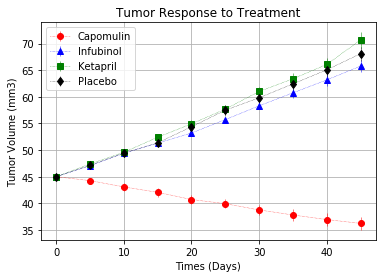

In [5]:
# Generate the Plot (with Error Bars)
x_axis = re_format_df['Drug Timepoint'].values
y_axis = {'Capomulin': ["r", "o"], 
          'Infubinol': ["b", "^"], 
          'Ketapril': ["g", "s"], 
          'Placebo': ["k", "d"]}
for key, value in y_axis.items():
    std_err = standard_error[standard_error['Drug'] == key]['Tumor Volume (mm3)'].tolist()
    plt.errorbar(x_axis, re_format_df[key].values, std_err, label=key, linestyle=':', color=value[0], marker=value[1], linewidth=0.5)

# set title, label, grid, legend 
plt.title("Tumor Response to Treatment")
plt.xlabel("Times (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend()

# Show the Figure
plt.savefig('Image/Tumor_Response_to_Treatment.png')
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
met_site = combine_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites']
mean_met_site = met_site.mean()

# Convert to DataFrame
mean_met_site = mean_met_site.reset_index()

# Preview DataFrame
mean_met_site.set_index(['Drug','Timepoint']).head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_met = met_site.sem()

# Convert to DataFrame
standard_error_met = standard_error_met.reset_index()

# Preview DataFrame
standard_error_met.set_index(['Drug', 'Timepoint']).head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
metsite_re_format_df = pd.DataFrame({'Drug Timepoint': drug_point})
for name in drug_name:
    metsite_re_format_df[name] = mean_met_site.loc[mean_met_site['Drug'] == name]['Metastatic Sites'].values
    
# Preview that Reformatting worked
metsite_re_format_df.set_index('Drug Timepoint').head()


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Drug Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


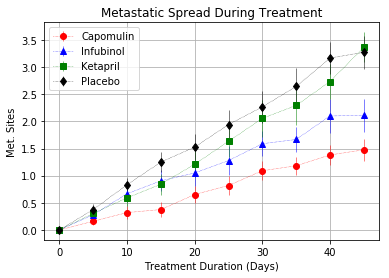

In [9]:
# Generate the Plot (with Error Bars)
for key, value in y_axis.items():
    std_err = standard_error_met[standard_error_met['Drug'] == key]['Metastatic Sites'].tolist()
    plt.errorbar(x_axis, metsite_re_format_df[key].values, std_err, label=key, color=value[0] ,marker=value[1], linestyle=':', linewidth=0.5)

# set title, label, grid, legend 
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()
plt.legend()

# Show the Figure
plt.savefig('Image/Metastatic_Spread_During_Treatment.png')
plt.show()


## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = combine_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
mouse_count = mouse_count.reset_index().rename(columns={'Mouse ID': 'Mouse Count'})

# Preview DataFrame
mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_df = pd.DataFrame({'Drug Timepoint': drug_point})
for name in drug_name:
    mouse_count_df[name] = mouse_count.loc[mean_met_site['Drug'] == name]['Mouse Count'].values
    
# Preview that Reformatting worked
mouse_count_df.set_index('Drug Timepoint').head()


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Drug Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


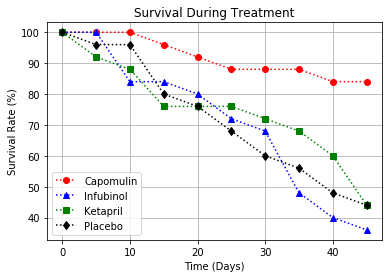

In [12]:
# Generate the Plot (Accounting for percentages)
for key, value in y_axis.items():
    survival_rate = 100*mouse_count_df[key].values/mouse_count_df[key].values[0]
    plt.plot(x_axis, survival_rate, label=key, color=value[0] ,marker=value[1], linestyle=':')

# set title, label, grid, legend 
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend()

# Show the Figure
plt.savefig('Image/Survival_During_Treatment.png')
plt.show()


## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
start = mean_tumor_volume[mean_tumor_volume['Timepoint'] == 0]['Tumor Volume (mm3)'].values
end = mean_tumor_volume[mean_tumor_volume['Timepoint'] == 45]['Tumor Volume (mm3)'].values
percent_change = 100*(end-start)/start
percentage_df = pd.DataFrame({'Drug': drug_name})
percentage_df['Percentage Change'] = percent_change

# Display the data to confirm
percentage_df = percentage_df.set_index('Drug')
percentage_df

,Percentage Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


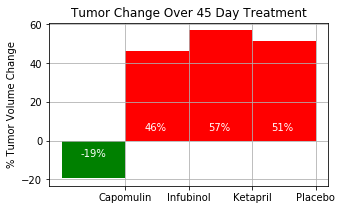

In [14]:
# Store all Relevant Percent Changes into a Tuple
drug_tuple = ('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')
percent_list = [percentage_df.loc[d].values[0] for d in drug_tuple]
percent_tuple = tuple(percent_list)

# Splice the data between passing and failing drugs
x_axis = np.array(drug_tuple)
y_axis = np.array(percent_tuple)
mask1 = y_axis < 0
mask2 = y_axis >= 0
plt.figure(figsize=(5,3))
plt.bar(x_axis[mask1], y_axis[mask1], color='g', width=-1, align="edge")
plt.bar(x_axis[mask2], y_axis[mask2], color='r', width=-1, align="edge")

# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.yticks(np.arange(-20, max(y_axis)+20, 20))
plt.grid()

# Use functions to label the percentages of changes
def label_percentage():
    for index, value in enumerate(y_axis):
        if value > 0:
            v_pos = 5
        else:
            v_pos = -8
        plt.text(index-0.7, v_pos, f"{int(value)}%", color='w')

# Call functions to implement the function calls
label_percentage()

# Save the Figure
plt.savefig("Image/Tumor_Change_Over_45_Day_Treatment.png")

# Show the Figure
plt.show()
